In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import AutoMinorLocator

np.set_printoptions(suppress=True)
plt.rcParams['font.family']='serif'

In [3]:
combined_df = pd.read_csv('https://raw.githubusercontent.com/thissop/MAXI-J1535/main/data/processed/fixed_merged.csv?token=AQN5JT44OFGXIMV7QILKFZLBYVPIA')

combined_df = combined_df.sample(frac=1) # shuffle the dataframe

freqs_1, freqs_2, freqs_3 = (np.array(combined_df[arr_name]) for arr_name in ['first_par1s', 'second_par1s', 'third_par1s'])

In [103]:

first_second_ratios = np.array([])
first_third_ratios = np.array([])
second_third_ratios = np.array([])
indexs = np.array([])

index = 0
for i, j, k in zip(freqs_1, freqs_2, freqs_3): 
    if i!=0: 
        if j!=0:
            first_second_ratios = np.append(first_second_ratios,j/i) 

            if k!=0: 
                first_third_ratios = np.append(first_third_ratios, k/i)
                second_third_ratios = np.append(second_third_ratios, k/j)
    index += 1


In [104]:
print(first_second_ratios)
print(first_third_ratios)

ratios = [first_second_ratios, first_third_ratios, second_third_ratios]

## Ugly -- gave up on finding nice one haha
all_ratios = np.array([])
for arr in ratios: 
    all_ratios = np.append(all_ratios, arr)
all_ratios = list(all_ratios)
all_ratios

print(ratios)

[2.02797785 2.0056972  2.05050543 2.64370149 1.96186231 2.00569672
 2.00569568 1.91899795 2.00570027 2.02797761 1.9618655  4.49270561
 1.98366739 1.98366254 1.98366238 1.9836636  2.0056912  6.05412725
 1.9618655  1.30361337 3.72345988 1.9618633  2.00569902 2.00570015
 2.00569316 2.02797583 1.98366159 2.02797806 1.98366299 1.98365908
 1.9836615  1.94031189 2.00569902 1.98366299 6.32767833 5.48114721
 1.98366515 1.96187191 1.9618702  1.96186962 1.98365912 5.48114721
 1.9836622  1.98366004 2.00570568 1.96186398 2.02797378 1.98366501
 1.96186433]
[5.12961266 9.01103562 3.05200495 7.46813307 3.05200495 2.85625558]
[array([2.02797785, 2.0056972 , 2.05050543, 2.64370149, 1.96186231,
       2.00569672, 2.00569568, 1.91899795, 2.00570027, 2.02797761,
       1.9618655 , 4.49270561, 1.98366739, 1.98366254, 1.98366238,
       1.9836636 , 2.0056912 , 6.05412725, 1.9618655 , 1.30361337,
       3.72345988, 1.9618633 , 2.00569902, 2.00570015, 2.00569316,
       2.02797583, 1.98366159, 2.02797806, 1.98

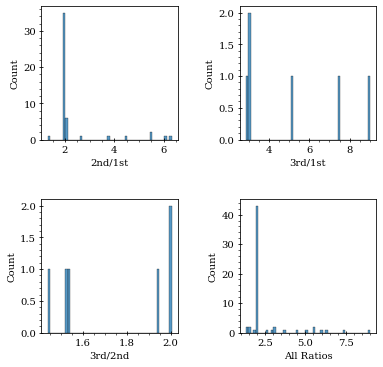

In [111]:
fig, axs = plt.subplots(2,2, figsize=(6,6))

xlabels = ['2nd/1st', '3rd/1st', '3rd/2nd', 'All Ratios']

for ax_idx, ax in enumerate([axs[0,0], axs[0,1], axs[1,0],axs[1,1]]):
    if ax_idx != 3: 
        sns.histplot(ratios[ax_idx], ax=ax, bins=50)
    else: 
        sns.histplot(all_ratios, ax=ax, bins=50)

    #ax.set(xscale='log')
    ax.set(xlabel=xlabels[ax_idx])
    ax.tick_params(axis="both", direction="inout")
    ax.xaxis.set_minor_locator(AutoMinorLocator())
    ax.yaxis.set_minor_locator(AutoMinorLocator())

plt.subplots_adjust(wspace=0.45, hspace=0.45)
plt.show()